In [1]:
x=1

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc

In [7]:
df1 = pd.read_csv('csv/binary_healthy_covid_CD16_all_healthy_no_study.csv', index_col=0)
df1

,logFC,logCPM,F,PValue,FDR
CLU,7.068717,6.426149,87.592385,2.026579e-13,4.468020e-11
IFI27,8.844066,11.364891,87.538207,2.049550e-13,4.468020e-11
RNASE2,5.874101,6.888456,83.292041,5.024142e-13,6.355129e-11
S100A8,4.925089,14.216802,82.599270,5.830394e-13,6.355129e-11
CD63,1.960839,9.588757,73.812404,4.113807e-12,3.587240e-10
...,...,...,...,...,...
HLA-DQA1,0.007802,8.878889,0.000520,9.818877e-01,9.909793e-01
RPL39,-0.001457,12.511793,0.000162,9.898851e-01,9.944568e-01
TLN1,0.002195,8.929570,0.000162,9.898950e-01,9.944568e-01
RPL18,-0.015929,11.819356,0.039206,9.954043e-01,9.976926e-01


In [8]:
df2 = pd.read_csv('csv/full_ct_binary_healthy_covid_CD16_no_study.csv', index_col=0)
df2

,logFC,logCPM,F,PValue,FDR
CD63,2.017256,9.711092,90.552433,1.117235e-13,3.226562e-11
C1QC,5.823801,9.195878,90.365469,1.160634e-13,3.226562e-11
IFI27,9.329346,11.820811,85.073179,3.483442e-13,6.455980e-11
C1QB,4.339917,9.980433,73.682809,4.285342e-12,5.956625e-10
CLU,6.623772,6.361986,66.892295,2.125787e-11,1.946171e-09
...,...,...,...,...,...
MACF1,0.006729,6.904994,0.001314,9.712058e-01,9.778561e-01
BIRC3,0.008450,6.216608,0.001191,9.725799e-01,9.778561e-01
TUBA1B,0.004975,10.148430,0.000838,9.770041e-01,9.805312e-01
NFKBIA,0.001143,12.114018,0.000050,9.944065e-01,9.961983e-01


In [9]:
df1 = df1[(np.abs(df1['logFC']) > 0.5) & (df1['FDR'] < 0.01)]
len(df1)

141

In [10]:
df2 = df2[(np.abs(df2['logFC']) > 0.5) & (df2['FDR'] < 0.01)]
len(df2)

159

In [16]:
df1['abslogFC'] = np.abs(df1['logFC'])
df1 = df1.sort_values('abslogFC', ascending=False)

/tmp/ipykernel_608415/3607797929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['abslogFC'] = np.abs(df1['logFC'])


In [17]:
df2['abslogFC'] = np.abs(df2['logFC'])
df2 = df2.sort_values('abslogFC', ascending=False)

/tmp/ipykernel_608415/1365706166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['abslogFC'] = np.abs(df2['logFC'])


In [18]:
# df1 > df2 -> good

In [19]:
len(set(df1.index).intersection(set(df2.index)))

100

In [20]:
len(set(df1.index).difference(set(df2.index)))

78

In [21]:
adata = sc.read('../../../pipeline/data/multigrate_mil/mtg3_clean_healthy_covid_embed/10394725ec_adata_both.h5ad')
adata

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 362426 × 2192
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'patient_id_colors', 'umap'
    obsm: 'X_umap', '_scvi_extra_categorical_covs', 'latent', 'latent_0', 'latent_1', 'latent_2', 'latent_3', 'latent_4'
    layers: 'count

In [22]:
rna = adata[:, :2000].copy()

In [23]:
markers1 = list(df1.index)
markers2 = list(df2.index)

In [24]:
up_markers1 = list(df1[df1['logFC'] > 0].index)
up_markers2 = list(df2[df2['logFC'] > 0].index)

In [25]:
down_markers1 = list(df1[df1['logFC'] < 0].index)
down_markers2 = list(df2[df2['logFC'] < 0].index)

In [26]:
len(up_markers1)

98

In [27]:
len(up_markers2)

129

In [28]:
len(down_markers1)

80

In [29]:
len(down_markers2)

40

In [30]:
markers1 = [gene for gene in markers1 if gene in rna.var_names]
markers2 = [gene for gene in markers2 if gene in rna.var_names]

In [31]:
up_markers1 = [gene for gene in up_markers1 if gene in rna.var_names]
up_markers2 = [gene for gene in up_markers2 if gene in rna.var_names]
down_markers1 = [gene for gene in down_markers1 if gene in rna.var_names]
down_markers2 = [gene for gene in down_markers2 if gene in rna.var_names]

In [32]:
len(up_markers1), len(up_markers2)

(98, 129)

In [33]:
len(down_markers1), len(down_markers2)

(80, 40)

In [34]:
len(markers1), len(markers2)

(178, 169)

In [35]:
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_utils.py:431: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


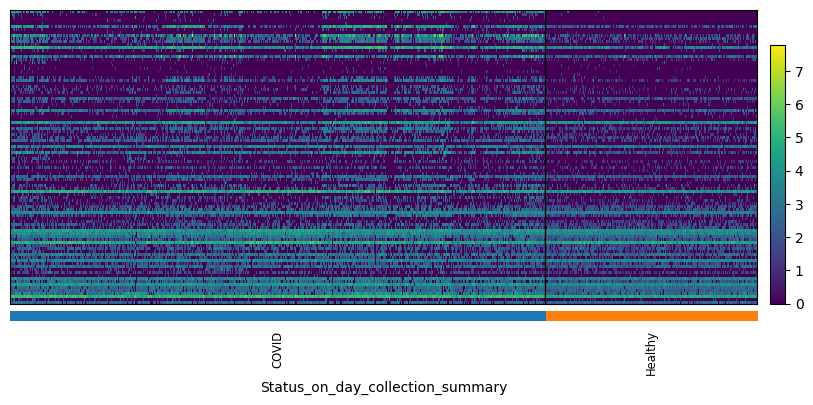

In [36]:
sc.pl.heatmap(rna[rna.obs['initial_clustering'] == 'CD16'], up_markers1, groupby='Status_on_day_collection_summary', swap_axes=True)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_utils.py:431: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


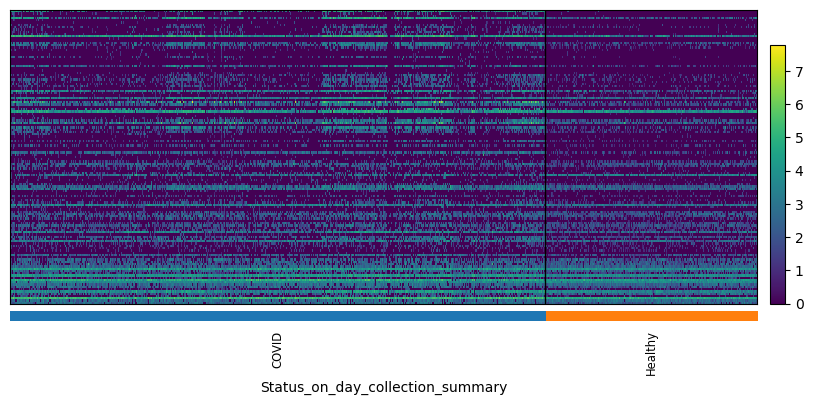

In [37]:
sc.pl.heatmap(rna[rna.obs['initial_clustering'] == 'CD16'], up_markers2, groupby='Status_on_day_collection_summary', swap_axes=True)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_utils.py:431: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


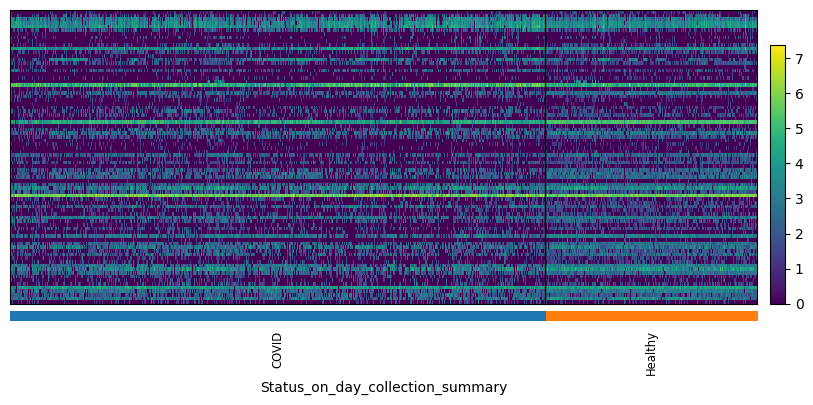

In [38]:
sc.pl.heatmap(rna[rna.obs['initial_clustering'] == 'CD16'], down_markers1, groupby='Status_on_day_collection_summary', swap_axes=True)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_utils.py:431: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


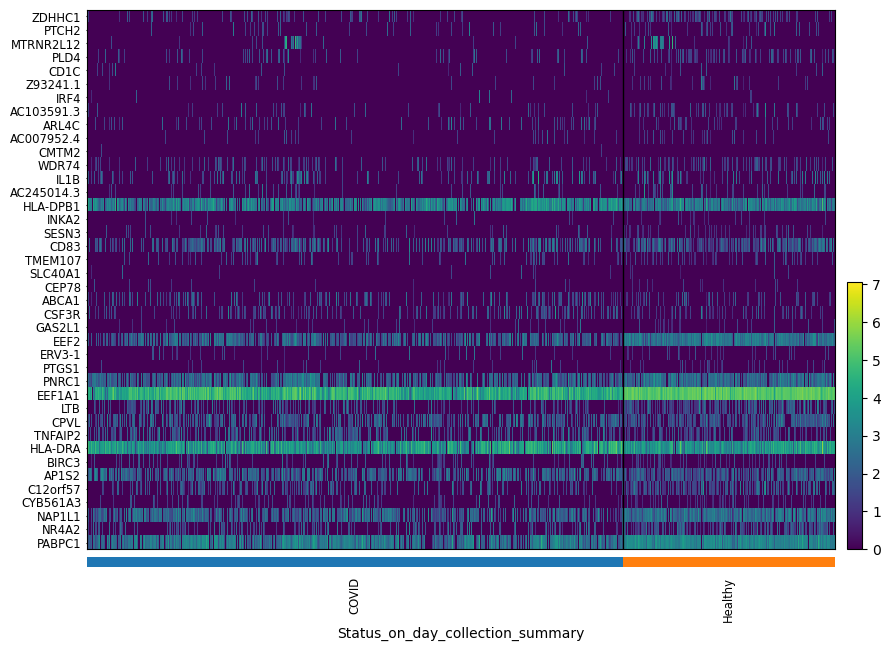

In [39]:
sc.pl.heatmap(rna[rna.obs['initial_clustering'] == 'CD16'], down_markers2, groupby='Status_on_day_collection_summary', swap_axes=True)

In [40]:
len(set(down_markers1).intersection(set(down_markers2)))

26

In [41]:
set(down_markers1).difference(set(down_markers2))

{'AOAH',
 'BHLHE40',
 'BNIP3L',
 'BTG2',
 'CCNH',
 'CD37',
 'CD74',
 'CDKN1A',
 'CX3CR1',
 'DUSP2',
 'EEF1B2',
 'EVL',
 'FGL2',
 'FOXP1',
 'FTH1',
 'GPR183',
 'HLA-DMA',
 'HLA-DPA1',
 'HLA-DQA1',
 'HLA-DQB1',
 'HLA-DRB1',
 'HLA-DRB5',
 'HSP90AB1',
 'HSPA8',
 'IER3',
 'ITGA4',
 'JUNB',
 'KLF4',
 'MARCKS',
 'MEF2C',
 'MS4A7',
 'MT-ND3',
 'MT-ND6',
 'NFKBIZ',
 'NPM1',
 'NR4A1',
 'PDE4B',
 'PHACTR1',
 'PSAP',
 'PTGER4',
 'RGS1',
 'RHOC',
 'RPL10A',
 'RPL4',
 'RPL5',
 'SARAF',
 'SNN',
 'TAGAP',
 'TUBB',
 'TXNIP',
 'YBX3',
 'ZFP36',
 'ZFP36L1',
 'ZFP36L2'}

In [ ]:
# ALDOA https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10800799/
# AOAH https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7931673/